In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
%cd "drive/My Drive/AI/NLP2 (private)"
!ls

/content/drive/My Drive/AI/NLP2 (private)
analysis.ipynb	prod_zoom.pdf	       syst_split_plot.pdf
data		random_baseline.ipynb  test_barplots.pdf
dist_plot.pdf	results		       Untitled0.ipynb


In [0]:
def read_file(fname):
  lines = []
  with open(fname, "r") as f:
    for line in f:
      lines.append(line[:-1])
  return np.array(lines)

def concatenate_data(directory):
  all_data = np.array([], dtype=str)
  for fname in os.listdir(directory):
    if fname[-3:] == "src":
      data = read_file(directory + "/" + fname)
      all_data = np.concatenate((all_data, data))
  return all_data


In [0]:
def count_whens(split):
  return sum(split == "when")

def count_tasks(split):
  return sum(split == "who") + sum(split == "what") + sum(split == "where")
  
def stats(data, max_whens=5, max_tasks=3, return_stats=False, fname=""):
  num_samples = len(data)
  when_dist = np.zeros(max_whens)
  task_dist = np.zeros(max_tasks)
  for sample in data:
    split = np.array(sample.split())
    when_dist[count_whens(split)] += 1
    task_dist[count_tasks(split)-1] += 1
  when_print = " ".join([str(int(i)) for i in when_dist])
  task_print = " ".join([str(int(i)) for i in task_dist])
  if fname != "":
    print("{:<25} {:<5} samples | questions: {:<16} | whens: {:<10} ".format(fname, num_samples, task_print, when_print))
  else:
    print(" {:<5} samples | questions: {:<16} | whens: {:<10} ".format(num_samples, task_print, when_print))
  if return_stats:
    return num_samples, task_dist, when_dist

In [0]:
def print_stats(directory):
  for fname in os.listdir(directory):
    if fname[-3:] == "src":
      data = read_file(directory + "/" + fname)
      stats(data, fname=fname)

In [0]:
data_path = "data/Final2/"

In [0]:
# main task (all data)

print_stats(data_path + "All")

dev5k_all.src             5000  samples | questions: 1732 1633 1635   | whens: 1642 1215 923 699 521 
test5k_all.src            5000  samples | questions: 1628 1699 1673   | whens: 1619 1214 914 698 555 
train30k_all.src          30000 samples | questions: 9987 9995 10018  | whens: 9704 7386 5458 4232 3220 


In [0]:
# systematicity

print_stats(data_path + "Systematicity/Test1")

syst1_test_exc012.src     10176 samples | questions: 1964 3512 4700   | whens: 3189 2511 1877 1443 1156 
syst1_train_exc012.src    25824 samples | questions: 9868 8486 7470   | whens: 8457 6320 4734 3606 2707 
syst1_test_inc012.src     4000  samples | questions: 1515 1329 1156   | whens: 1319 984 684 580 433 


In [0]:
# productivity (questions)

print_stats(data_path + "Productivity/Tasks/Test1")
print_stats(data_path + "Productivity/Tasks/Test2")
print()
print_stats(data_path + "Productivity/Tasks")

prod1_train_12tasks.src   22674 samples | questions: 11347 11327 0    | whens: 7226 5613 4223 3181 2431 
prod2_train_13tasks.src   22673 samples | questions: 11347 0 11326    | whens: 7364 5589 4147 3173 2400 

prod_test_1tasks.src      2000  samples | questions: 2000 0 0         | whens: 629 490 365 306 210 
prod_test_3tasks.src      2000  samples | questions: 0 0 2000         | whens: 653 464 356 297 230 
prod_test_2tasks.src      2000  samples | questions: 0 2000 0         | whens: 679 507 335 260 219 


In [0]:
# productivity (whens)
print_stats(data_path + "Productivity/Whens/Test3")
print_stats(data_path + "Productivity/Whens/Test4")
print_stats(data_path + "Productivity/Whens/Test5")
print()
print_stats(data_path + "Productivity/Whens")

prod3_train_012whens.src  24075 samples | questions: 7987 8048 8040   | whens: 10965 7815 5295 0 0 
prod4_train_0123whens.src 27704 samples | questions: 9196 9256 9252   | whens: 10965 7815 5295 3629 0 
prod5_train_024whens.src  18556 samples | questions: 6090 6203 6263   | whens: 10965 0 5295 0 2296 

prod_test_4whens.src      2000  samples | questions: 657 666 677      | whens: 0 0 0 0 2000 
prod_test_2whens.src      2000  samples | questions: 695 658 647      | whens: 0 0 2000 0 0 
prod_test_0whens.src      2000  samples | questions: 673 675 652      | whens: 2000 0 0 0 0 
prod_test_3whens.src      2000  samples | questions: 685 645 670      | whens: 0 0 0 2000 0 
prod_test_1whens.src      2000  samples | questions: 694 637 669      | whens: 0 2000 0 0 0 


In [0]:
all_data = concatenate_data(data_path + "All")
num_samples, questions, whens = stats(all_data, return_stats=True, fname="all_data")

all_data                  40000 samples | questions: 13347 13327 13326 | whens: 12965 9815 7295 5629 4296 


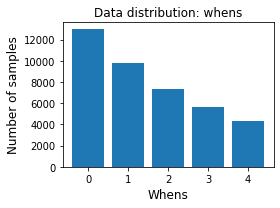

In [0]:
plt.figure(figsize=(4,3))
plt.title("Data distribution: whens", fontsize=12)
plt.bar(range(len(whens)), whens)
plt.xlabel("Whens", fontsize=12)
plt.ylabel("Number of samples", fontsize=12)
plt.tight_layout()
plt.savefig("when_dist.pdf")
plt.show()

In [0]:
sum(whens)

30000.0